<center>  <h1>  Fiche TP4 </h1></center>

- Hanifi Fatima El-Batoul
- Groupe 02 IAA

In [1]:
#Bibliothèques 
import numpy as np
import pandas as pd
from io import StringIO
import cv2
import matplotlib.pyplot as plt
# Importing necessary libraries
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO

En premier lieu nous allons initialiser nos cinque séquences sous forme de tableaux (chaque tableau correspond à une séquance et chaque case de tableau contient une base "A,G,C,T" ordonné selon les séquences qui ont été données dans l'énoncer du TP), nous initialiserons également indel "_", idt = 2 qui correpond à l'indentité soit que les deux bases soit pareille, sub = 1 qui représente la substitution soit deux bases différentes et le gap = -2  

In [2]:
#Initialisation 

seq1 = ['A','C','G','C','G','A','T','G','A','C','C','G','G','G','C','C','T','T','G','T','A','A','A','A','T']
seq2 = ['A','C','C','C','T','A','C','C','T','G','T','C','G','T','A','T','T','G','T','A','A','T']
seq3 = ['A','T','G','A','T','G','A','C','A','G','G','G','C','T','T','G','T','A','A','C','T']
seq4 = ['T','T','C','A','T','G','A','C','C','G','G','C','T','T','A','T','A','C','T','T','A','T']
seq5 = ['T','T','C','G','C','T','A','C','C','T','G','A','T','C','G','T','A','C','G','G','T','A','T','C','T']

SEQ= [seq1,seq2,seq3,seq4,seq5]

indel = ['_']

idt = 2
sub = -1
gap = -2

In [3]:
def multiple(seqA, seqB):
    score = []
    leng=0
    SP = []
    if len(seqB)<len(seqA):
        
        leng = len(seqB)
        diff = (len(seqA)-len(seqB))*gap
        
    else :
        leng = len(seqA)
        diff = (len(seqB)-len(seqA))*gap
        
    for i in range (0,leng):
        x = 0
        if seqB[i] == seqA[i] :
            score.append(idt)
            
        elif seqB[i]== '_' or seqA[i] =='_':
            score.append(gap)
        else :
            score.append(sub)

    
    score = sum(score)+diff
    return score

In [4]:
multiple(seq1, seq2)

-7

In [5]:
multiple(seq1, seq3)

-14

In [6]:
multiple(seq1, seq4)

-22

In [7]:
multiple(seq1, seq5)

-16

In [8]:
multiple(seq2, seq3)

-5

In [9]:
multiple(seq2, seq4)

11

In [10]:
multiple(seq2, seq5)

-19

In [11]:
multiple(seq3, seq4)

4

In [12]:
multiple(seq3, seq5)

-14

In [13]:
multiple(seq4, seq5)

5

In [16]:
def SP():
    SEQ = [seq1,seq2,seq3,seq4,seq5]
    t=[]
    for i in range(len(SEQ)):
        x = SEQ[i]
        for j in range(i+1,len(SEQ)):
            y = SEQ[j]
            print("score d'alignement  entre\n seq" ,i+1,"et seq",j+1,":")
            r=multiple(x,y)
            t.append(multiple(x,y))
            print(r)
    score=sum(t)
    print(t)
    print("Somme des pairs est :",score)
            
SP()

score d'alignement  entre
 seq 1 et seq 2 :
-7
score d'alignement  entre
 seq 1 et seq 3 :
-14
score d'alignement  entre
 seq 1 et seq 4 :
-22
score d'alignement  entre
 seq 1 et seq 5 :
-16
score d'alignement  entre
 seq 2 et seq 3 :
-5
score d'alignement  entre
 seq 2 et seq 4 :
11
score d'alignement  entre
 seq 2 et seq 5 :
-19
score d'alignement  entre
 seq 3 et seq 4 :
4
score d'alignement  entre
 seq 3 et seq 5 :
-14
score d'alignement  entre
 seq 4 et seq 5 :
5
[-7, -14, -22, -16, -5, 11, -19, 4, -14, 5]
Somme des pairs est : -77


### <center>  l’arbre phylogénétique en se basant sur la méthode NJ

In [120]:
#Distance 

def dist(seqa,seqb) :
    
    dist = max(len(seqa),len(seqb))
   
    
    for i in range(min(len(seqa),len(seqb))) :
        if seqa[i] == seqb[i] :
           
            dist = dist -1
    return dist


In [121]:
num_seq = ['S1','S2','S3','S4','S5']
distance = [
                [],    #S1
                [dist(seq1,seq2)],      #S2
                [dist(seq1,seq3), dist(seq2,seq3)],  #S3
                [dist(seq1,seq4), dist(seq2,seq4), dist(seq3,seq4)],   #S4
                [dist(seq1,seq5), dist(seq2,seq5), dist(seq3,seq5), dist(seq4,seq5)],  #S5
                     #S1                   #S2             #S3               #S5

    ]

In [122]:
print('la table des distances :',distance)

la table des distances : [[], [18], [20, 16], [23, 11, 13], [22, 22, 20, 14]]


In [148]:
#matrice de distance
def matr_dist(sequences):
    length=len(sequences)
    distance=np.zeros((length,length))
    r=len(sequences[0])
    i=0
    j=i+1
    while i<length :
        x = sequences[i]
        j=i+1
        while j<length :
            y = sequences[j]
            k=0
            for z in range(length):
                f=dist(x,y)
            distance[j][i]=f
            j=j+1
        i=i+1
    
    Matrix=distance.T
    result=distance+Matrix
    return result

In [149]:
#affich matrice de distance
D_matrix=matr_dist(SEQ)
D_matrix=D_matrix.astype(int)
df=pd.DataFrame(data=D_matrix,columns=["S1","S2","S3","S4","S5"],index=["S1","S2","S3","S4","S5"])  

In [150]:
df

,S1,S2,S3,S4,S5
S1,0,18,20,23,22
S2,18,0,16,11,22
S3,20,16,0,13,20
S4,23,11,13,0,14
S5,22,22,20,14,0


In [218]:
####################################################
					#  NJ predefinie
####################################################

In [212]:
# Read the sequences and align
align = AlignIO.read('msa.phy','phylip')
print(align)

Alignment with 5 rows and 25 columns
ACGCGATGACCGGGCCTTGTAAAAT sequence1
ACCCTACCTGTCGTATTGTAAT--- sequence2
ATGATGACAGGGCTTGTAACT---- sequence3
TTCATGACCGGCTTATACTTAT--- sequence4
TTCGCTACCTGATCGTACGGTATCT sequence5


In [216]:
# Calculate the distance matrix
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)
# Creating a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()

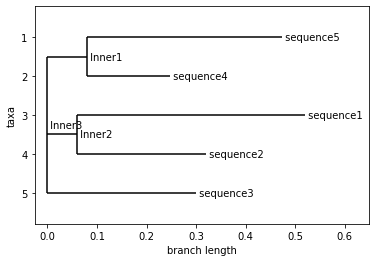

            _________________________________________________ sequence5
  _________|
 |         |____________________ sequence4
 |
_|       ___________________________________________________________ sequence1
 |______|
 |      |_________________________________ sequence2
 |
 |_____________________________________ sequence3



In [217]:
#  NJ

# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distMatrix)

# Draw the phlyogenetic tree
Phylo.draw(NJTree)

# Printing the phlyogenetic tree using terminal
Phylo.draw_ascii(NJTree)


### Algorithme Claustal

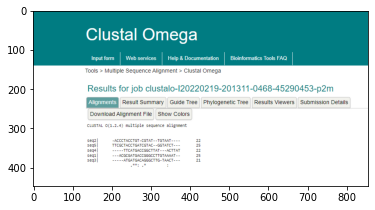

In [221]:
img=plt.imread("alignement.png")
plt.imshow(img)

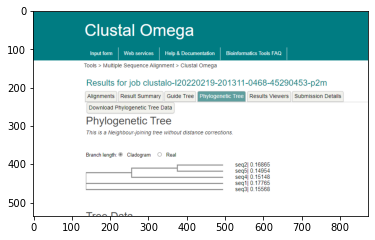

In [220]:
img=plt.imread("tree.png")
plt.imshow(img)

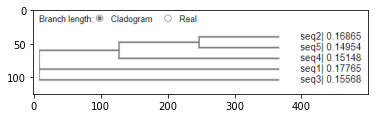

In [222]:
img=plt.imread("tree1.png")
plt.imshow(img)

#### Remarque : les deux algorithmes nj et claustral ne donnent pas les meme résultat cela est du aux différences de calcul de distances, pendant que nj fusionne d'abbord la séquence 5 avec la séquence 4 puis fusionne ces dernière avec la 2 ème suivie de la 1ère puis la 3ème séquence 

#### l'algorithme claustral fusionne d'abbord la séquence 2 avec la séquence 5 ensuite le tout avec la séquence 4 , la 1èr avec la 3ème puis fusionne le tout ensemble 